In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet , Segment
from bokeh.models.formatters import NumeralTickFormatter
from bokeh.models.tools import HoverTool
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.font_manager as fm

In [66]:
def f(txt, mapping):
    return [mapping[key] for key in txt]

In [67]:
mapping = {'PA_SWD_S':'● Average sedentary time / day (for study, during weekdays)',
           'PA_SWD_N':'● Average sedentary time / day (for non-study, during weekdays)',
           'PA_SWK_S':'● Average sedentary time / day (for study, during weekends)',
           'PA_SWK_N':'● Average sedentary time / day (for non-study, during weekends)',
           'INT_WK_MM': '● Average time of Internet use / day (for non-study, during weekends)',
           'INT_WD_MM': '● Average time of Internet use / day (for non-study time, during weekdays) ',
           'INT_SPWD_TM':'● Average time of Internet use / day (for non-study time, during weekdays)',
           'INT_SPWK_TM':'● Average time of Internet use /day (for non-study time, during weekends)',
           'TC_FAGE':'● Age of starting smoking',
           
           'AC_FAGE':' ● Age of starting drinking',
           'TC_ACCESS': '♠ Difficulty of purchasing to cigarettes',
           
           'AC_ACCESS': '♠ Difficulty of purchasing to alcohol',
           'TC_AMNT':'● Amount of smoking/day',
           'AC_AMNT':'● Amount of dinking/day',
           
           'F_BR':'● Skipping breakfast',
           'E_S_RCRD':'★ Academic achievement',
           'F_CS':'● Frequncy of taking fastfood',
           'F_FASTFOOD':'● Frequncy of taking fastfood',
           
           'M_SLP_EN':'▲ Perceived sleep enough',
           'TC_QT_YR':'● Ever quit smoking',
           'GRADE':'★ School grade',
           'PR_HT':'▲ Perceived health status',
           
           'AC_DAYS':'● Frequncy of drinking/month',
           'E_SES':'■ Economic level of family',
           'M_STR':'◆ Perceived stress',
           'TC_A_LT':'● Ever smoking',
           
           'bmi':'▲ Body mass index',
           'O_BR_S':'● Frequency of toothbrushing after lunch/week',
           'PR_BI':'▲ Perceived Body shape',
           'WC_MN':'▲ Effort to control body weight',
           
           'CTYPE':'♠ Type of city living in',
           'STYPE':'♠ Type of school1', #*각주1 (co-educational/ single gender)
           'SCHOOL':'♠ Type of school2', #*각주2 (regular/ vocational)
           'M_SAD':'◆ Ever depressed',
           'FN2':'■ Living with parents',
           'parents2':'■ At least one of parents alive',
           'M_SUI_CON':'◆ Ever thought of suicide?',
           
           'E_RES': '■ Type of Residential',
           'S_EDU':'▲ Ever taken sex education',
           'MH':'♥ Middle / high school(school environment)',
           'M_SUI_ATT':'◆ Ever attempted suicide',
           'AC_LT':'● Ever drinking',
           'M_SUI_PLN':'◆ Ever planned suicide?',
           
           'V_TRT':'▲ Number of treatment after assault',
           'RF':'■ Remarried parents',
           'DR_EXP':'● Ever drug-use',
           'DR_HAB':'● Habitual drug-use ',
           'MF':'■ Multicultural family'}



## 2019

In [68]:
y2019 = pd.read_csv("C:/Users/default.DESKTOP-HUJV032/간호대_논문_코드/y2019_last.csv",encoding='cp949',index_col=0)
data = y2019[y2019['SEX']==2]

In [69]:
y2019['S_SI'].value_counts()

1    54021
2     3282
Name: S_SI, dtype: int64

In [70]:
data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
data['STYPE'].replace({'남녀공학':0,'여학교': 1}, inplace=True)
data['CTYPE'].replace({'군지역':0,'대도시': 1,'중소도시':2}, inplace=True)

#
data.drop(['SEX'], axis = 1, inplace = True)
#
#data.drop(['Unnamed: 0', 'SEX','S_FAGE'], axis = 1, inplace = True)

data.dropna(inplace = True)

datas = data.iloc[:,:44]
data_target = data.iloc[:,44:45]

C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [71]:
f_imp1,f_imp2,f_imp3,f_imp4,f_imp5 = None,None,None,None,None
col_n = 1

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for train_index, test_index in kfold.split(datas, data_target):
    X_train, X_test = datas.iloc[train_index,:], datas.iloc[test_index,:]
    y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
    
    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_train, y_train)

    
    predict2 = rf.predict(X_test)
    print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, predict2)))
    
    globals()['f_imp' + str(col_n)] =rf.feature_importances_
    col_n +=1

visual_rf19 = pd.DataFrame((f_imp1,f_imp2,f_imp3,f_imp4,f_imp5),columns= datas.columns)
visual_rf19

visual_rf19T = visual_rf19.T
visual_rf19m = visual_rf19T.mean(axis=1)

visual_rf19m = pd.DataFrame(visual_rf19m).sort_values(by = 0,ascending=False) # 내림차순
visual_rf19m

C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.971


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.974


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.973


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.973


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3318134305.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.973


,0
PA_SWD_S,0.055565
PA_SWK_S,0.049872
PA_SWK_N,0.046766
PA_SWD_N,0.046139
INT_WK_MM,0.045360
INT_WD_MM,0.045091
TC_FAGE,0.039908
F_BR,0.036562
AC_FAGE,0.033592
F_CS,0.032442


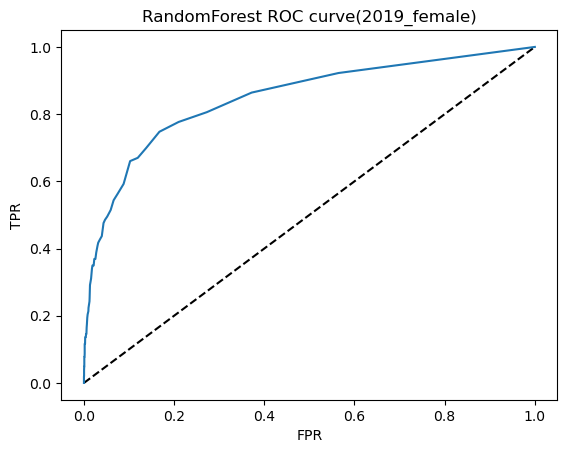

In [72]:
pred_positive_label = rf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test-1, pred_positive_label)
plt.plot([0,1], [0,1], "k--")
plt.plot(fprs, tprs, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve(2019_female)')
plt.show()

In [73]:
roc_auc_score(y_test-1, pred_positive_label)

0.8477793449385715

In [74]:
cf = confusion_matrix(y_test, predict2)
print(cf)

report = classification_report(y_test, predict2)
print(report)

[[3659    3]
 [  97    6]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99      3662
           2       0.67      0.06      0.11       103

    accuracy                           0.97      3765
   macro avg       0.82      0.53      0.55      3765
weighted avg       0.97      0.97      0.96      3765



## 2020

In [75]:
y2020 = pd.read_csv("C:/Users/default.DESKTOP-HUJV032/간호대_논문_코드/y2020_last.csv",encoding='cp949',index_col=0)
data = y2020[y2020['SEX']==2]

In [76]:
data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
data['STYPE'].replace({'남녀공학':0,'여학교': 1}, inplace=True)
data['CTYPE'].replace({'군지역':0,'대도시': 1,'중소도시':2}, inplace=True)

#
data.drop(['SEX'], axis = 1, inplace = True)
#
#data.drop(['Unnamed: 0', 'SEX','S_FAGE'], axis = 1, inplace = True)

data.dropna(inplace = True)

datas = data.iloc[:,:44]
data_target = data.iloc[:,44:45]

C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [77]:
f_imp1,f_imp2,f_imp3,f_imp4,f_imp5 = None,None,None,None,None
col_n = 1

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for train_index, test_index in kfold.split(datas, data_target):
    X_train, X_test = datas.iloc[train_index,:], datas.iloc[test_index,:]
    y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
    
    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_train, y_train)

    
    predict2 = rf.predict(X_test)
    print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, predict2)))
    
    globals()['f_imp' + str(col_n)] =rf.feature_importances_
    col_n +=1

visual_rf20 = pd.DataFrame((f_imp1,f_imp2,f_imp3,f_imp4,f_imp5),columns= datas.columns)
visual_rf20

visual_rf20T = visual_rf20.T
visual_rf20m = visual_rf20T.mean(axis=1)

visual_rf20m = pd.DataFrame(visual_rf20m).sort_values(by = 0,ascending=False) # 내림차순
visual_rf20m

C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.970


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.971


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.970


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.970


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\3471239544.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.970


,0
PA_SWD_S,0.052183
INT_SPWD_TM,0.051377
INT_SPWK_TM,0.049591
PA_SWK_N,0.047721
PA_SWD_N,0.045721
PA_SWK_S,0.041637
TC_FAGE,0.035177
TC_AMNT,0.034663
F_BR,0.032719
AC_FAGE,0.030024


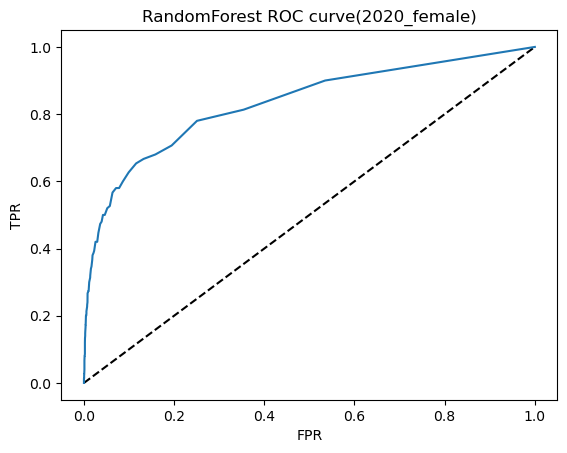

In [78]:
pred_positive_label = rf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test-1, pred_positive_label)
plt.plot([0,1], [0,1], "k--")
plt.plot(fprs, tprs, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve(2020_female)')
plt.show()

In [79]:
roc_auc_score(y_test-1, pred_positive_label)

0.8321727767182312

In [80]:
x_train, x_test, y_train, y_test = train_test_split(datas, data_target,test_size=0.3, random_state=1)

y_train_pred = cross_val_predict(rf, x_train, y_train, cv=5)
cf = confusion_matrix(y_train, y_train_pred)
print(cf)

report = classification_report(y_train, y_train_pred)
print(report)

C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\mode

[[16509    25]
 [  467    41]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99     16534
           2       0.62      0.08      0.14       508

    accuracy                           0.97     17042
   macro avg       0.80      0.54      0.56     17042
weighted avg       0.96      0.97      0.96     17042



## 2021

In [81]:
y2021 = pd.read_csv("C:/Users/default.DESKTOP-HUJV032/간호대_논문_코드/y2021_last.csv",encoding='cp949',index_col=0)
data = y2021[y2021['SEX']==2]

In [82]:
data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
data['STYPE'].replace({'남녀공학':0,'여학교': 1}, inplace=True)
data['CTYPE'].replace({'군지역':0,'대도시': 1,'중소도시':2}, inplace=True)

#
data.drop(['SEX'], axis = 1, inplace = True)
#
#data.drop(['Unnamed: 0', 'SEX','S_FAGE'], axis = 1, inplace = True)

data.dropna(inplace = True)

datas = data.iloc[:,:44]
data_target = data.iloc[:,44:45]

C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2108154020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [83]:
f_imp1,f_imp2,f_imp3,f_imp4,f_imp5 = None,None,None,None,None
col_n = 1

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for train_index, test_index in kfold.split(datas, data_target):
    X_train, X_test = datas.iloc[train_index,:], datas.iloc[test_index,:]
    y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
    
    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_train, y_train)

    
    predict2 = rf.predict(X_test)
    print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, predict2)))
    
    globals()['f_imp' + str(col_n)] =rf.feature_importances_
    col_n +=1

visual_rf21 = pd.DataFrame((f_imp1,f_imp2,f_imp3,f_imp4,f_imp5),columns= datas.columns)
visual_rf21

visual_rf21T = visual_rf21.T
visual_rf21m = visual_rf21T.mean(axis=1)

visual_rf21m = pd.DataFrame(visual_rf21m).sort_values(by = 0,ascending=False) # 내림차순
visual_rf21m

C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.966


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.966


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.965


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.967


C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_train, y_test = data_target.values[[train_index]], data_target.values[[test_index]]
C:\Users\default.DESKTOP-HUJV032\AppData\Local\Temp\ipykernel_11676\2327454650.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


테스트 세트 정확도: 0.967


,0
INT_SPWK_TM,0.055502
INT_SPWD_TM,0.052586
PA_SWD_S,0.051705
PA_SWK_N,0.047183
TC_AMNT,0.044986
PA_SWK_S,0.043437
PA_SWD_N,0.043178
TC_QT_YR,0.037972
TC_FAGE,0.037125
F_BR,0.032584


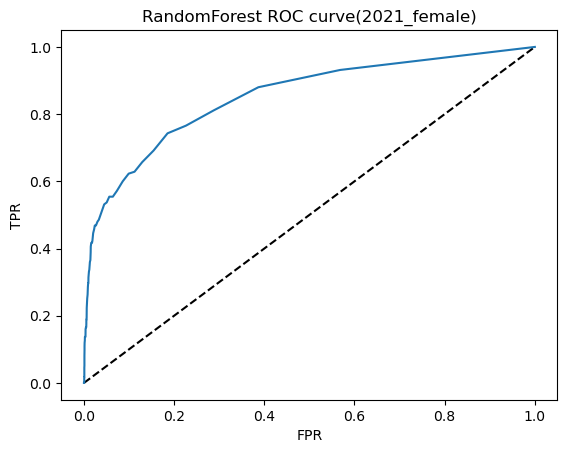

In [84]:
pred_positive_label = rf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test-1, pred_positive_label)
plt.plot([0,1], [0,1], "k--")
plt.plot(fprs, tprs, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve(2021_female)')
plt.show()

In [85]:
roc_auc_score(y_test-1, pred_positive_label)

0.8516195341482697

In [86]:
x_train, x_test, y_train, y_test = train_test_split(datas, data_target,test_size=0.3, random_state=1)

y_train_pred = cross_val_predict(rf, x_train, y_train, cv=5)
cf = confusion_matrix(y_train, y_train_pred)
print(cf)

report = classification_report(y_train, y_train_pred)
print(report)



C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\default.DESKTOP-HUJV032\anaconda3\lib\site-packages\sklearn\mode

[[16399    55]
 [  516    86]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98     16454
           2       0.61      0.14      0.23       602

    accuracy                           0.97     17056
   macro avg       0.79      0.57      0.61     17056
weighted avg       0.96      0.97      0.96     17056



## 랜덤 포레스트 결과 정리

In [74]:
visual_rf19m.reset_index(inplace=True)
visual_rf20m.reset_index(inplace=True)
visual_rf21m.reset_index(inplace=True)

In [75]:
a = pd.merge(visual_rf19m, visual_rf20m, left_on='index', right_on='index', how='outer')
b = pd.merge(a, visual_rf21m, left_on='index', right_on='index', how='outer')
b.columns = ['index', 'feature_imp_19', 'feature_imp_20', 'feature_imp_21']

In [76]:
b.to_excel('featureimp_rf_female.xlsx')

## 엑셀 정리하고 시각화
- 변수명은 다르지만 의미가 같은 것은 하나로 묶어야 함

### non grouping 

In [4]:
imp = pd.read_excel("C:/Users/default.DESKTOP-HUJV032/간호대_논문_코드/featureimp_rf_female.xlsx",index_col=0)

In [5]:
n = len(imp)
x = [1,2,3]*n
temp = []
num = n
for i in range(n):
    temp.append([num]*3)
    num = num - 1
y = sum(temp, [])

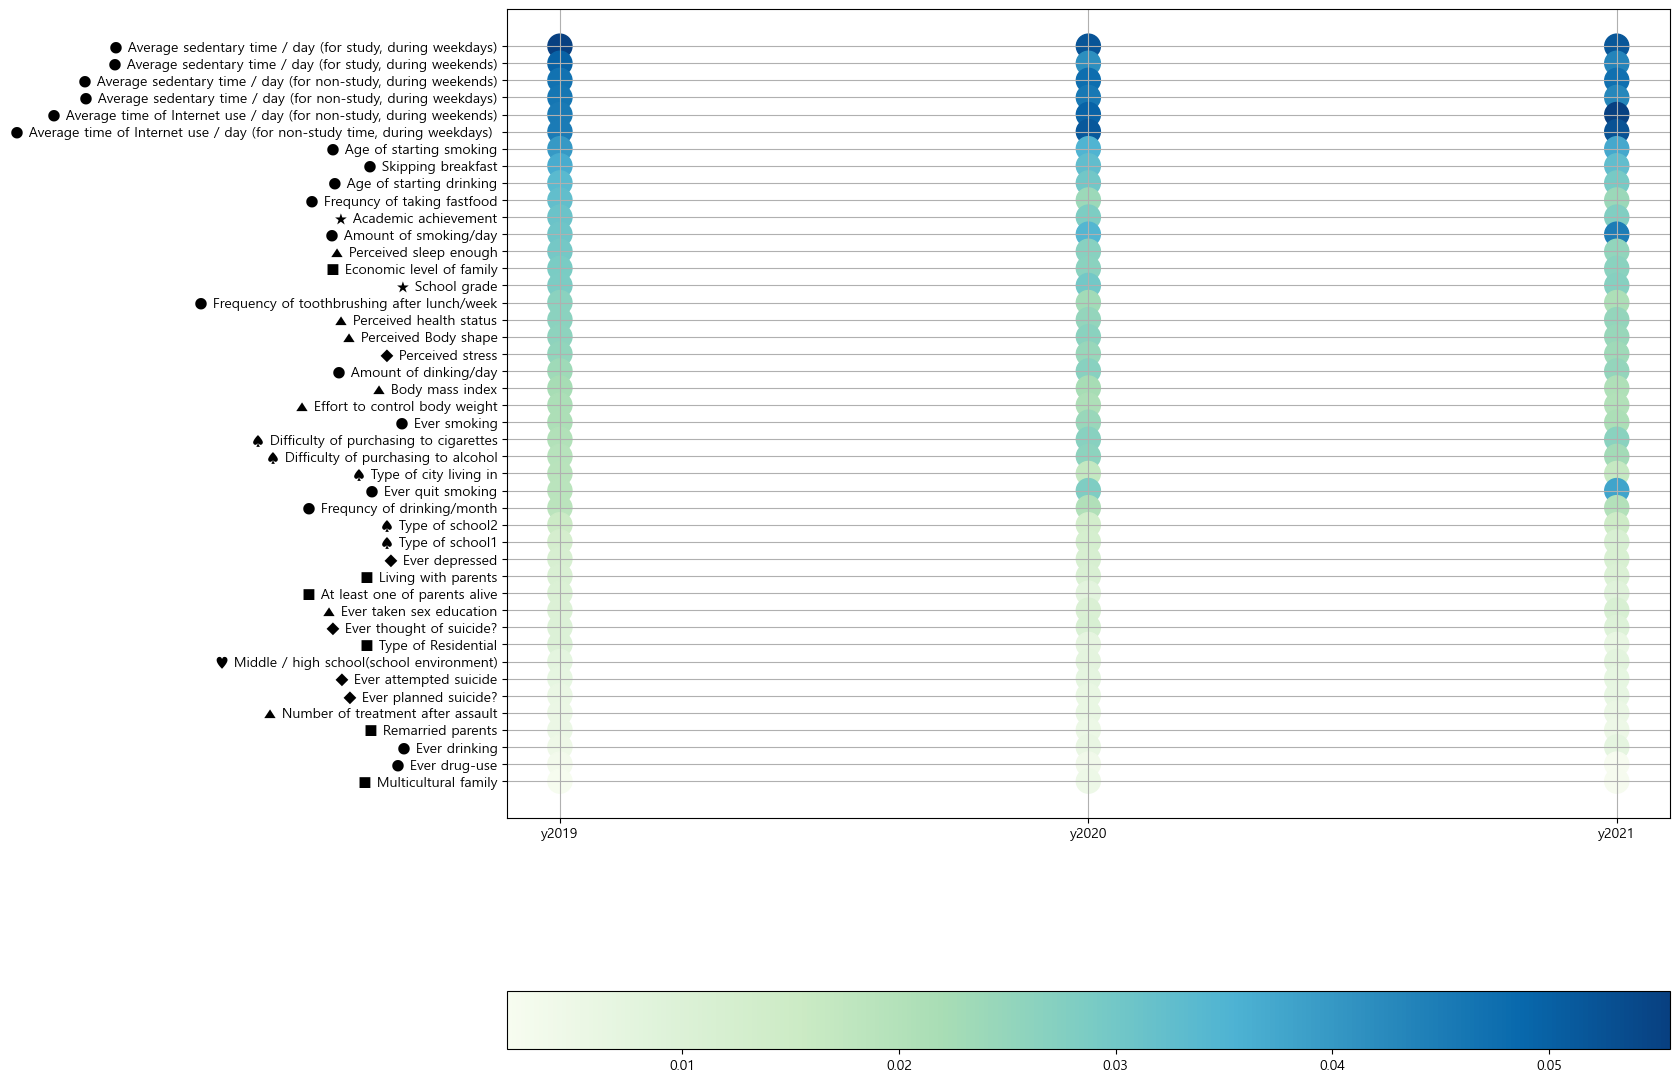

In [8]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.figure(figsize=(15,15))
plt.scatter(x,y,s = 300,c=imp.iloc[:,1:4].values.reshape(-1),cmap='GnBu')
plt.xticks(range(1,4),['y2019','y2020','y2021'])
#plt.xlim([0.5, 4.5])
plt.yticks(range(1,n+1),f(imp['index'].values[::-1],mapping))
plt.grid(True)
plt.colorbar(orientation='horizontal')

### grouping 

In [7]:
imp = pd.read_excel("C:/Users/default.DESKTOP-HUJV032/간호대_논문_코드/featureimp_rf_female_gr.xlsx",index_col=0)

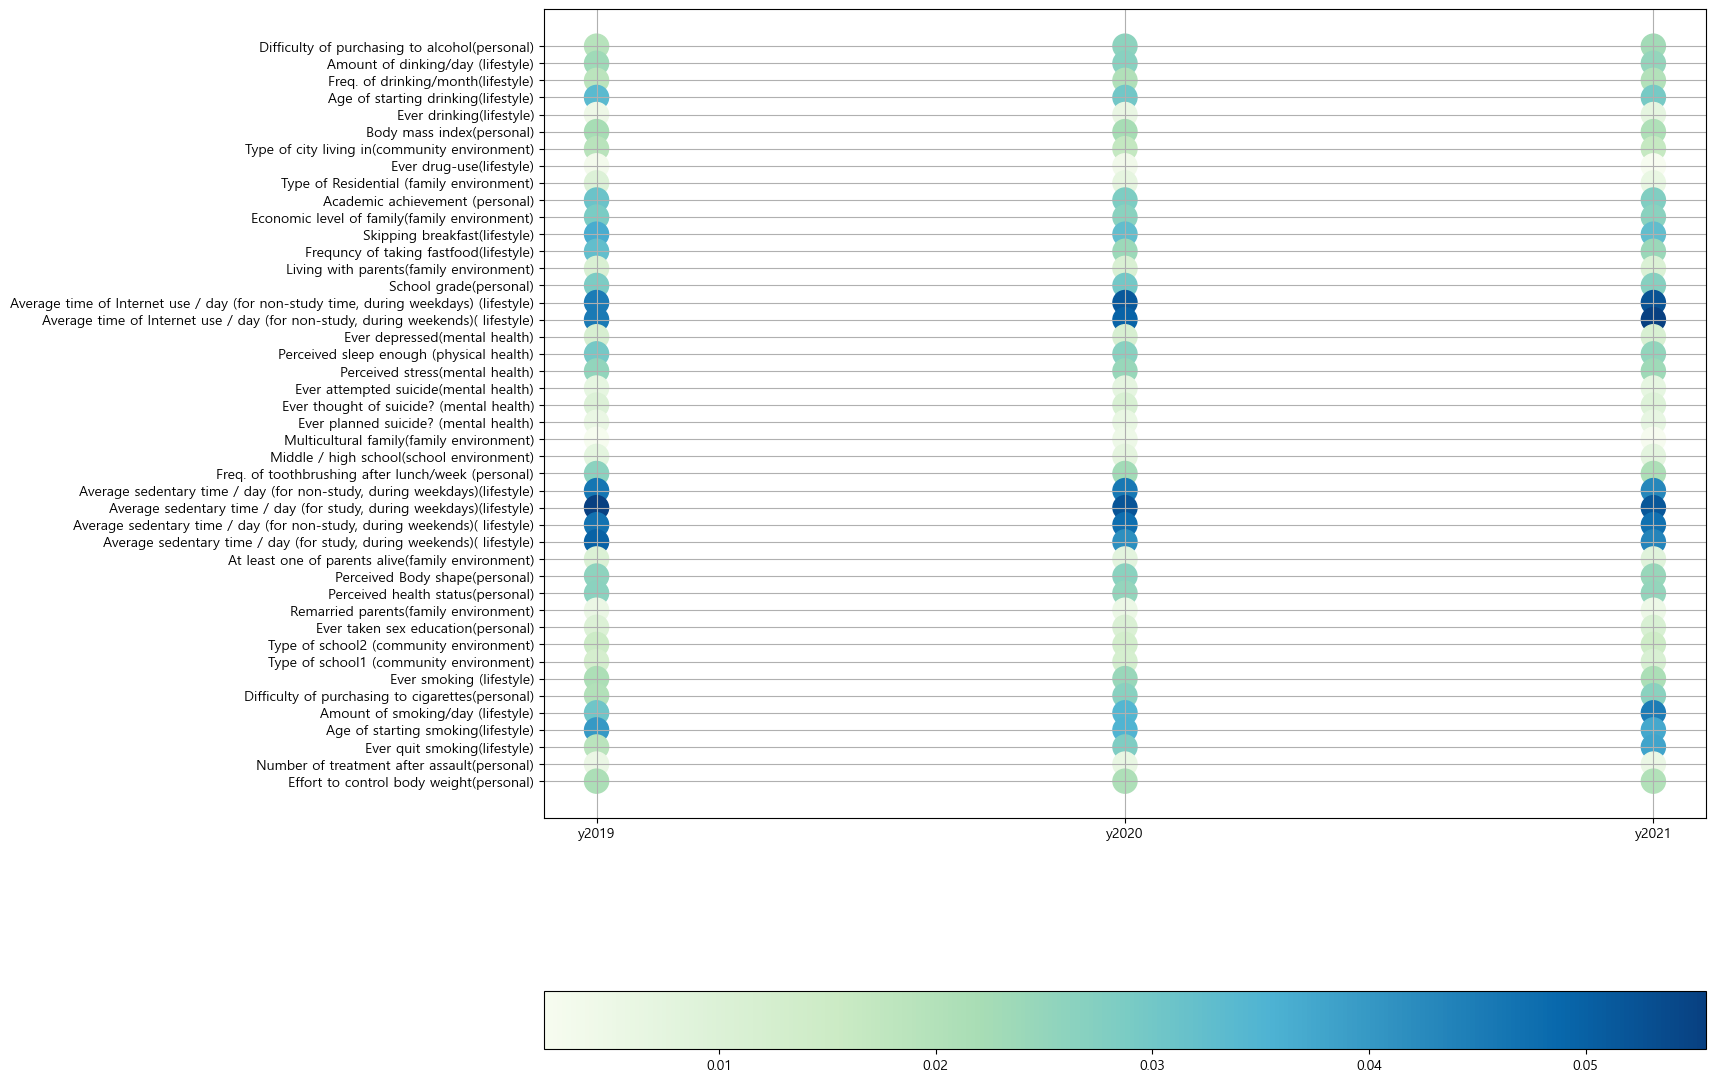

In [8]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.figure(figsize=(15,15))
plt.scatter(x,y,s = 300,c=imp.iloc[:,1:4].values.reshape(-1),cmap='GnBu')
plt.xticks(range(1,4),['y2019','y2020','y2021'])
#plt.xlim([0.5, 4.5])
plt.yticks(range(1,n+1),f(imp['index'].values[::-1],mapping))
plt.grid(True)
plt.colorbar(orientation='horizontal')